<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`


`Nombre: MARIA PAULA SILVA FUENTES`    
`Código: 616202030`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [3]:
# Cargar datos
path = '/content/reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [4]:
#Revisar que los datos estén balanceados
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [5]:
#Dividir el conjunto de datos en trining y test (80% para training - 20% para test)
train, test = train_test_split(data, test_size=0.2, random_state=42)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [6]:
stop_words = set(stopwords.words("english"))

In [7]:
#Función de pre-procesado
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stop_words]
    texto = " ".join(texto)
    return texto

In [8]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf_vect.fit(train.review_body.values);

In [9]:
X_train = tfidf_vect.transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3370)
Tamaño de X_test (prueba): (200, 3370)
Tamaño de y_train 800 y tamaño de y_test 200


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [10]:
#Importar librería
from sklearn.svm import LinearSVC

In [11]:
#Inicializar el clasificador
svm = LinearSVC(class_weight='balanced')

In [12]:
#Entrenar el modelo
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [13]:
#Hacer predicción
y_pred_svm = svm.predict(X_test)

In [14]:
#Definir exactitud
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")

SVM:                    0.80


In [15]:
#Otras métricas
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
  print(metrica.__name__)
  print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='jewelry'):.2f}")

precision_score
SVM: 0.77
recall_score
SVM: 0.81
f1_score
SVM: 0.79


###  `[BONUS: 3 pts]` Matriz de confusión

In [16]:
#Matriz de confusión
confusion_matrix(y_test, y_pred_svm)

array([[79, 18],
       [23, 80]])

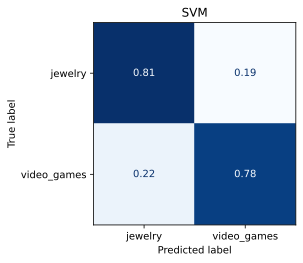

In [17]:
#Visualización de la matriz
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(10,10))

ax3 = fig.add_subplot(2,2,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3, normalize='true').im_.colorbar.remove() 
plt.title("SVM");

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [21]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab

{1161: 'es',
 1032: 'el',
 1975: 'mismísimo',
 1707: 'juego',
 795: 'del',
 2169: 'ordenador',
 692: 'creía',
 2568: 'que',
 1516: 'habrían',
 1916: 'mejorado',
 1830: 'los',
 1480: 'gráficos',
 129: 'algo',
 1063: 'en',
 3021: 'sí',
 1247: 'está',
 298: 'bien',
 2325: 'pero',
 2837: 'se',
 2569: 'queda',
 677: 'corto',
 2222: 'para',
 1536: 'hay',
 103: 'ahora',
 1735: 'la',
 2468: 'primera',
 3290: 'vez',
 588: 'compro',
 153: 'amazon',
 2878: 'será',
 3194: 'ultima',
 2424: 'porque',
 1505: 'ha',
 2889: 'sido',
 2311: 'perfecta',
 2035: 'muy',
 338: 'buenas',
 573: 'compramos',
 521: 'colgante',
 1361: 'forma',
 752: 'de',
 659: 'corazón',
 2102: 'nos',
 2822: 'salido',
 783: 'defectuoso',
 690: 'creo',
 2838: 'sea',
 2372: 'plata',
 3306: 'vino',
 377: 'caja',
 3350: 'ya',
 3196: 'un',
 2384: 'poco',
 2632: 'rayado',
 1582: 'ido',
 2635: 'rayando',
 1818: 'llevándolo',
 714: 'cuerpo',
 2911: 'sin',
 374: 'caerse',
 2248: 'pasando',
 120: 'al',
 710: 'cuello',
 1003: 'durado',
 318:

In [25]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Las palabras que contribuyen a la clase 0 (Jewerly)
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]

[('pulsera', -1.9),
 ('foto', -1.85),
 ('gracias', -1.85),
 ('calidad', -1.73),
 ('pendientes', -1.7),
 ('cadena', -1.49),
 ('bonita', -1.41),
 ('plata', -1.35),
 ('son', -1.34),
 ('bonitos', -1.21)]

In [27]:
# Las palabras que contribuyen a la clase 1 (video_games)
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(logreg.coef_[0]))][-10:]

[('perfecto', 1.04),
 ('descripción', 1.05),
 ('consola', 1.06),
 ('jugar', 1.09),
 ('grupos', 1.17),
 ('botones', 1.19),
 ('hijo', 1.24),
 ('ps', 1.29),
 ('mando', 1.72),
 ('juego', 3.37)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?



*   Los datos se encontraban balanceados y por tanto se pudo hacer una excelente partitura entre training (80%) y test (20%).
*   El modelo de Support Vector Machine (SVM) nos reportó una exactitud del 80%, esto quiere decir que el modelo acertó en sus respuestas en el 80%.
*   Los falsos positivos y negativos reportados por el modelo son bastantes altos. Frente a lo cual, valdría la pena revisar los resultados obtenidos por otros modelos. 



